<a href="https://colab.research.google.com/github/BankNatchapol/Comparison-of-Quantum-Gradient/blob/main/concept_implementation/qiskit_optimize_quadratic_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install qiskit_optimization

In [ ]:
# useful additional packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx

from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Clique, Knapsack
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo

#**Max-cut**

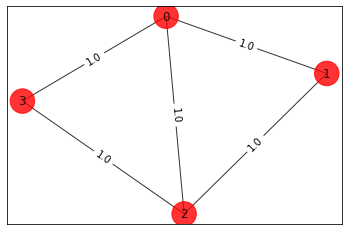

In [ ]:
# Generating a graph of 4 nodes

n = 4  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


draw_graph(G, colors, pos)

In [ ]:
# Computing the weight matrix from the random graph
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = temp["weight"]
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-cut

Maximize
 obj: 3 x_0 + 2 x_1 + 3 x_2 + 2 x_3 + [ - 4 x_0*x_1 - 4 x_0*x_2 - 4 x_0*x_3
      - 4 x_1*x_2 - 4 x_2*x_3 ]/2
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1

Binaries
 x_0 x_1 x_2 x_3
End



## Ising Hamiltonian

In [ ]:
qubitOp, offset = qp.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: -2.5
Ising Hamiltonian:
0.5 * ZZII
+ 0.5 * IZZI
+ 0.5 * ZIIZ
+ 0.5 * IZIZ
+ 0.5 * IIZZ


In [ ]:
# solving Quadratic Program using exact classical eigensolver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qp)
print(result)

optimal function value: 4.0
optimal value: [1. 0. 1. 0.]
status: SUCCESS


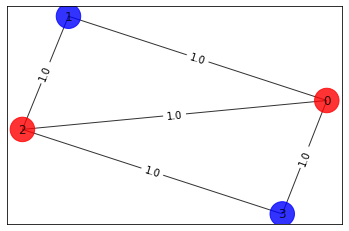

In [ ]:
colors = ["r" if result.x[node] == 1 else "b" for node in G.nodes() ]
pos = nx.spring_layout(G)

draw_graph(G, colors, pos)

# **Clique**

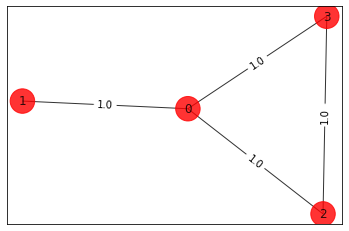

In [ ]:
# Generating a graph of 4 nodes

n = 4  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (2, 3, 1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)

draw_graph(G, colors, pos)

In [ ]:
# Computing the weight matrix from the random graph
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = temp["weight"]
clique = Clique(w)
qp = clique.to_quadratic_program()
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Clique

Maximize
 obj: x_0 + x_1 + x_2 + x_3
Subject To
 c0: x_1 + x_2 <= 1
 c1: x_1 + x_3 <= 1

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1

Binaries
 x_0 x_1 x_2 x_3
End



## Ising Hamiltonian

In [ ]:
qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: 0.5
Ising Hamiltonian:
-0.75 * ZIII
- 0.75 * IZII
- 2.0 * IIZI
+ 1.25 * ZIZI
+ 1.25 * IZZI
+ 0.5 * IIIZ


In [ ]:
# solving Quadratic Program using exact classical eigensolver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qubo)
print(result)

optimal function value: -3.0
optimal value: [1. 0. 1. 1.]
status: SUCCESS


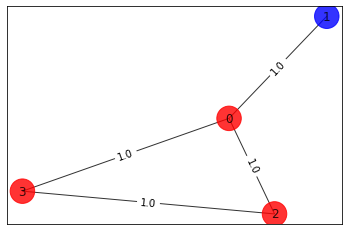

In [ ]:
colors = ["r" if result.x[node] == 1 else "b" for node in G.nodes() ]
pos = nx.spring_layout(G)

draw_graph(G, colors, pos)

# **Binary Linear Programming**
Problem : CHB Inc., is a bank holding company that is 
evaluating the potential for expanding into 
a 13-county region in the southwestern part 
of the state. State law permits establishing 
branches in any county that is adjacent to 
a county in which a PPB (principal place of 
business) is located. The following map 
shows the 13-county region with the 
population of each county indicated.
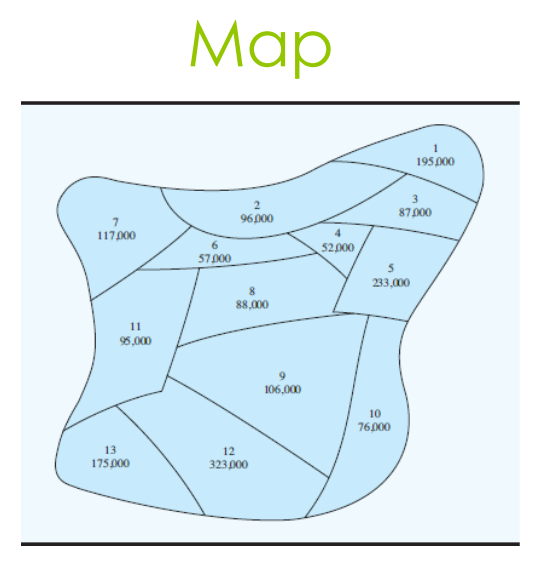

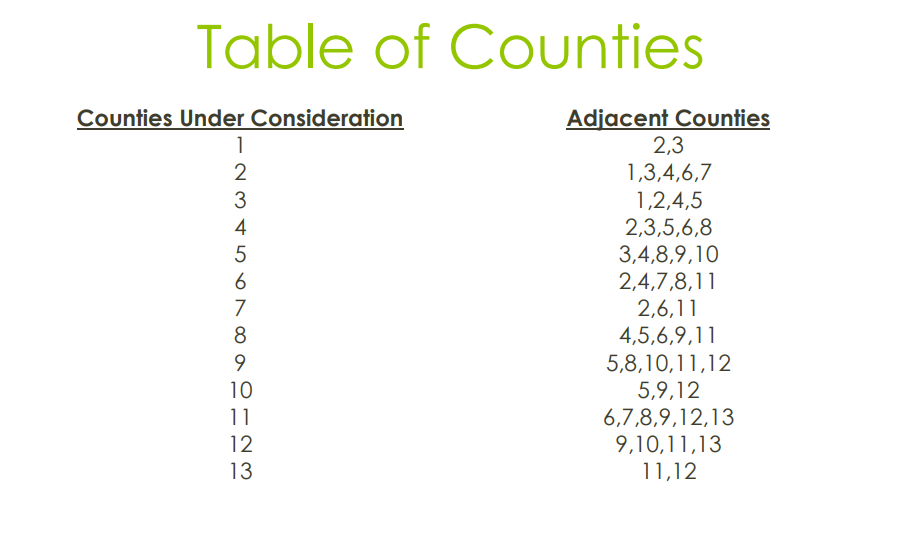

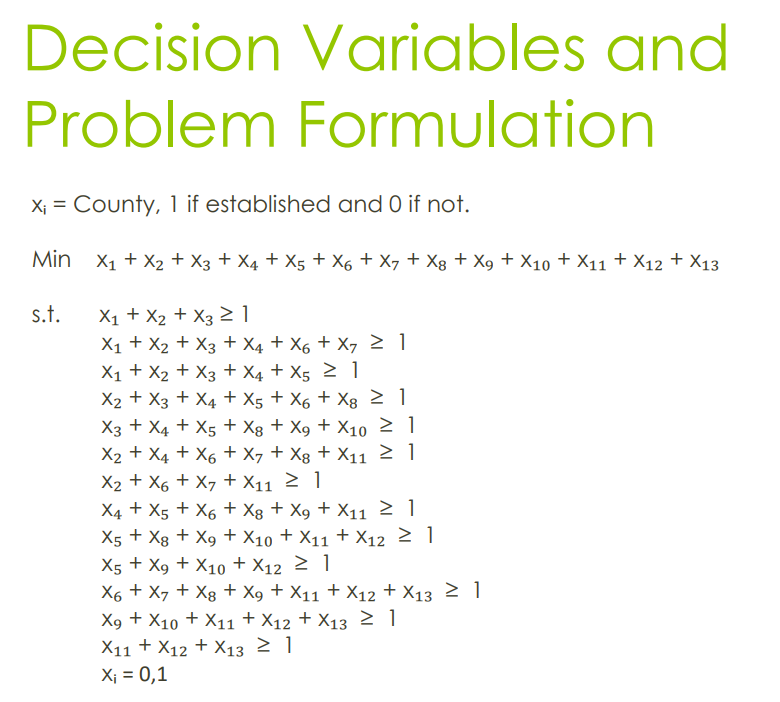

In [ ]:
# Make a Docplex model
from docplex.mp.model import Model

num_county = 4
mdl = Model("docplex model")
x1 = mdl.binary_var("x1")
x2 = mdl.binary_var("x2")
x3 = mdl.binary_var("x3")
x4 = mdl.binary_var("x4")

mdl.minimize(195000*x1 + 96000*x2 + 87000*x3 + 52000*x4)
mdl.add_constraint(x1 + x2 + x3 >= 1)
mdl.add_constraint(x2 + x3 + x4 >= 1)

# load from a Docplex model
mod = from_docplex_mp(mdl)
print(mod.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: docplex model

Minimize
 obj: 195000 x1 + 96000 x2 + 87000 x3 + 52000 x4
Subject To
 c0: x1 + x2 + x3 >= 1
 c1: x2 + x3 + x4 >= 1

Bounds
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1
 0 <= x4 <= 1

Binaries
 x1 x2 x3 x4
End



## Ising Hamiltonian

In [ ]:
qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(mod)
qubitOp, offset = qubo.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: 1505003.0
Ising Hamiltonian:
-215000.5 * ZIIIIIII
- 215000.5 * IZIIIIII
+ 215000.5 * ZZIIIIII
- 215000.5 * IIZIIIII
- 215000.5 * IIIZIIII
+ 215000.5 * IIZZIIII
+ 189000.5 * IIIIZIII
- 215000.5 * ZIIIZIII
- 215000.5 * IZIIZIII
+ 386501.0 * IIIIIZII
- 215000.5 * ZIIIIZII
- 215000.5 * IZIIIZII
- 215000.5 * IIZIIZII
- 215000.5 * IIIZIZII
+ 215000.5 * IIIIZZII
+ 382001.0 * IIIIIIZI
- 215000.5 * ZIIIIIZI
- 215000.5 * IZIIIIZI
- 215000.5 * IIZIIIZI
- 215000.5 * IIIZIIZI
+ 215000.5 * IIIIZIZI
+ 430001.0 * IIIIIZZI
+ 117500.5 * IIIIIIIZ
- 215000.5 * IIZIIIIZ
- 215000.5 * IIIZIIIZ
+ 215000.5 * IIIIIZIZ
+ 215000.5 * IIIIIIZZ


In [ ]:
# solving Quadratic Program using exact classical eigensolver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qubo)
print(result)

optimal function value: 87000.0
optimal value: [0. 0. 1. 0. 0. 0. 0. 0.]
status: SUCCESS


In [ ]:
for i in range(num_county):
  print(f"x{i+1} : ", result.x[i])

x1 :  0.0
x2 :  0.0
x3 :  1.0
x4 :  0.0


# **Knapsack**
Problem: 
Consider the problem having weights and profits are:

Weights: {3, 4, 6, 5}

Profits: {2, 3, 1, 4}

The weight of the knapsack is 8 kg

The number of items is 4

The above problem can be solved by using the following method:

In [ ]:
num_item = 4
weights = [3, 4, 6, 5]
profits = [2, 3, 1, 4]
max_weight = 8
knapsack = Knapsack(profits, weights, max_weight)
qp = knapsack.to_quadratic_program()
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Knapsack

Maximize
 obj: 2 x_0 + 3 x_1 + x_2 + 4 x_3
Subject To
 c0: 3 x_0 + 4 x_1 + 6 x_2 + 5 x_3 <= 8

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1

Binaries
 x_0 x_1 x_2 x_3
End



## **Ising Hamiltonian**

In [ ]:
qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: 567.0
Ising Hamiltonian:
-55.0 * ZIIIIIII
- 220.0 * IZIIIIII
+ 22.0 * ZZIIIIII
- 110.0 * IIZIIIII
+ 11.0 * ZIZIIIII
+ 44.0 * IZZIIIII
- 55.0 * IIIZIIII
+ 5.5 * ZIIZIIII
+ 22.0 * IZIZIIII
+ 11.0 * IIZZIIII
- 273.0 * IIIIZIII
+ 27.5 * ZIIIZIII
+ 110.0 * IZIIZIII
+ 55.0 * IIZIZIII
+ 27.5 * IIIZZIII
- 329.5 * IIIIIZII
+ 33.0 * ZIIIIZII
+ 132.0 * IZIIIZII
+ 66.0 * IIZIIZII
+ 33.0 * IIIZIZII
+ 165.0 * IIIIZZII
- 218.5 * IIIIIIZI
+ 22.0 * ZIIIIIZI
+ 88.0 * IZIIIIZI
+ 44.0 * IIZIIIZI
+ 22.0 * IIIZIIZI
+ 110.0 * IIIIZIZI
+ 132.0 * IIIIIZZI
- 164.0 * IIIIIIIZ
+ 16.5 * ZIIIIIIZ
+ 66.0 * IZIIIIIZ
+ 33.0 * IIZIIIIZ
+ 16.5 * IIIZIIIZ
+ 82.5 * IIIIZIIZ
+ 99.0 * IIIIIZIZ
+ 66.0 * IIIIIIZZ


In [ ]:
# solving Quadratic Program using exact classical eigensolver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qubo)
print(result)

optimal function value: -6.0
optimal value: [1. 0. 0. 1. 0. 0. 0. 0.]
status: SUCCESS


In [ ]:
items = []
for i, v in enumerate(result.x[:num_item]):
  if v:
    items.append(i+1)
print("Select items number:", items)
print("Sum weight:", sum(w*result.x[i] for i, w in enumerate(weights)))
print("Sum profit:", sum(p*result.x[i] for i, p in enumerate(profits)))

Select items number: [1, 4]
Sum weight: 8.0
Sum profit: 6.0
